### Data Science Regression Project: Predicting Home Prices in Banglore

Dataset is downloaded from here:https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

### Data Load: Load banglore home price into a dataframe

In [3]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [4]:
df1.columns # its giving how many numbers columns in data frame

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()# giving the unique value in area_type coulumn

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
df1['area_type'].value_counts()# its counts the number of value from particular columns area_type
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Drop features that are not requred to build our model

In [10]:
#print(df1.groupby('area_type').agg('count'))

In [8]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [10]:
df2 = df1.drop(['area_type','availability','society','balcony'], axis='columns')# droped unnecessary columns from data sets
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Data Cleaning : Handle NA values

In [11]:
df2.isnull().sum()# checking the columns which has (rows) no values

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df3.shape

(13246, 5)

<b> Feature Engineering </b>

In [23]:
df3['size'].unique()# its give unique value from size column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))# tokenize the sting into two parts and took only first part

c:\users\naresh\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [38]:
df3['bhk'].unique()# here some rows have 43 and 27 bhk but real it is not possible

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [39]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [40]:
df3.total_sqft.unique()# it has given some range value value(1133 - 1384)

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
# this function is giving the float value

In [17]:
df3[~df3['total_sqft'].apply(is_float)].head(10)# ~ negate operator it give reverse condition but we want to range value

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


<b> Above shows that total_sqft can be a range(e.g. 2100-2850). For such case we can just take average of min and max value in the range.There are other cases such as 34.46Sq. Meter which can convert to squre ft using conversation. I am going to just drop such corner cases to keep things simple</b>

In [20]:
def convert_sqrt_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
convert_sqrt_to_num('2133')

2133.0

In [30]:
convert_sqrt_to_num('3067 - 8156')

5611.5

In [23]:
convert_sqrt_to_num('34.46Sq. Meter')

In [24]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqrt_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


<b> For below row, it shows total_sqft as 5611 which is an average of the range 3067-8156 </b>

In [31]:
df4.loc[122]

location      Hebbal
size           4 BHK
total_sqft    5611.5
bath               4
price            477
bhk                4
Name: 122, dtype: object

In [34]:
(3067+8156)/2

5611.5

In [35]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


### Feature Engineering

<b>Add new feature called price per square feet</b>

In [27]:
df5  = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']# taking the price per squre foot
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [29]:
len(df5.location.unique())

1304

<b>Examine locations which is a categorical variable. We need to apply dimentionality reduction technique here to reduce number of locations</b>

In [40]:
df5.location = df5.location.apply(lambda x: x.strip())

location_status = df5.groupby('location')['location'].agg('count')
#location_status

In [41]:
df5.location = df5.location.apply(lambda x: x.strip())

location_status = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_status
# sorting the location value based on how many rows or data points in particulat location

location
Whitefield                                      535
Sarjapur  Road                                  392
Electronic City                                 304
Kanakpura Road                                  266
Thanisandra                                     236
Yelahanka                                       210
Uttarahalli                                     186
Hebbal                                          176
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Bannerghatta Road                               152
Hennur Road                                     150
7th Phase JP Nagar                              149
Haralur Road                                    141
Electronic City Phase II                        131
Rajaji Nagar                                    106
Chandapura                                       98
Bellandur                                        96
Hoodi                                            88
KR 

In [46]:
len(location_status[location_status<=10])# checking how many location have less than 10 data points

1052

### Dimensionality Reduction
<b> Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. later on when we do one hot encoding, it will help us with having fewer dummy columns

In [47]:
location_status_less_than_10 = location_status[location_status<=10]
location_status_less_than_10

location
BTM 1st Stage                                   10
Basapura                                        10
Sector 1 HSR Layout                             10
Naganathapura                                   10
Kalkere                                         10
Nagadevanahalli                                 10
Nagappa Reddy Layout                            10
Sadashiva Nagar                                 10
Gunjur Palya                                    10
Dairy Circle                                    10
Ganga Nagar                                     10
Dodsworth Layout                                10
1st Block Koramangala                           10
Chandra Layout                                   9
Jakkur Plantation                                9
2nd Phase JP Nagar                               9
Yemlur                                           9
Mathikere                                        9
Medahalli                                        9
Volagerekallahalli    

In [48]:
len(df5.location.unique())

1293

In [49]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_status_less_than_10 else x)
len(df5.location.unique())

242

In [50]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### Outlier Removal Using Business Logic
<b> As a data scientist when we have a conversation with our business manager (Who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft.If we have for example 400 sqft aprtment with 2 bhk than that seems suspicious and can be removed as an outlier.We will remove such outliers by keeping our minimum threshold per bhk to be 300 sqft </b>

In [51]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [81]:
df5.shape

(13246, 7)

In [53]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]# removed some outlier which has lsess 300 sqft_ft per bedroom
df6.shape

(12502, 7)

In [54]:
df6.price_per_sqft.describe()# its give basic statics on price_per_sqft column

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [55]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):# group by location wise
        m = np.mean(subdf.price_per_sqft)# compute mean value of price_per_sqft
        st = np.std(subdf.price_per_sqft)# compute standard deviation of price_per_sqft
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]# taking only +- one standard deviation data
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)# appending data into other dataframe
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

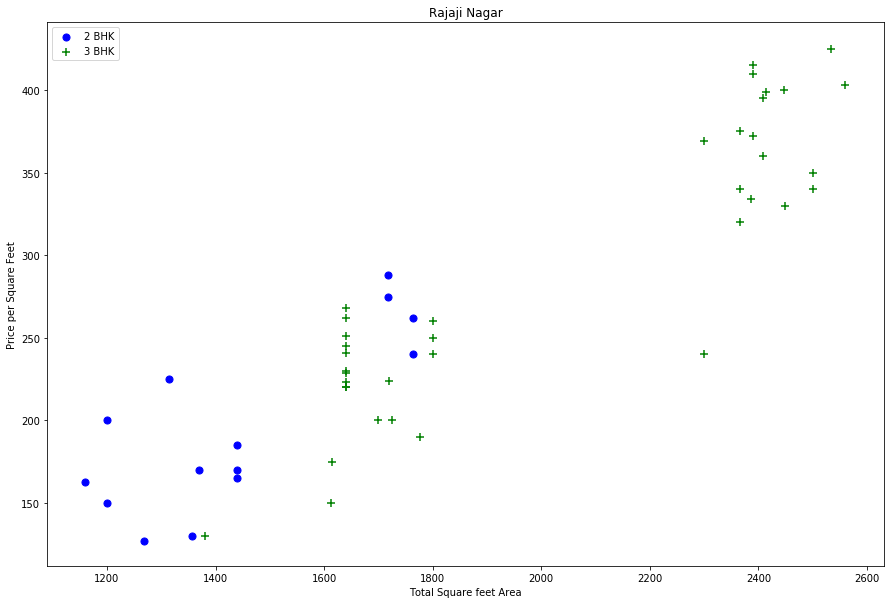

In [98]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker='+',color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square feet Area")
    plt.ylabel("Price per Square Feet")
    plt.title(location)
    plt.legend()
    plt.savefig('Rajaji_Nagar_outliers.png', dpi=300)
    
plot_scatter_chart(df7,"Rajaji Nagar")

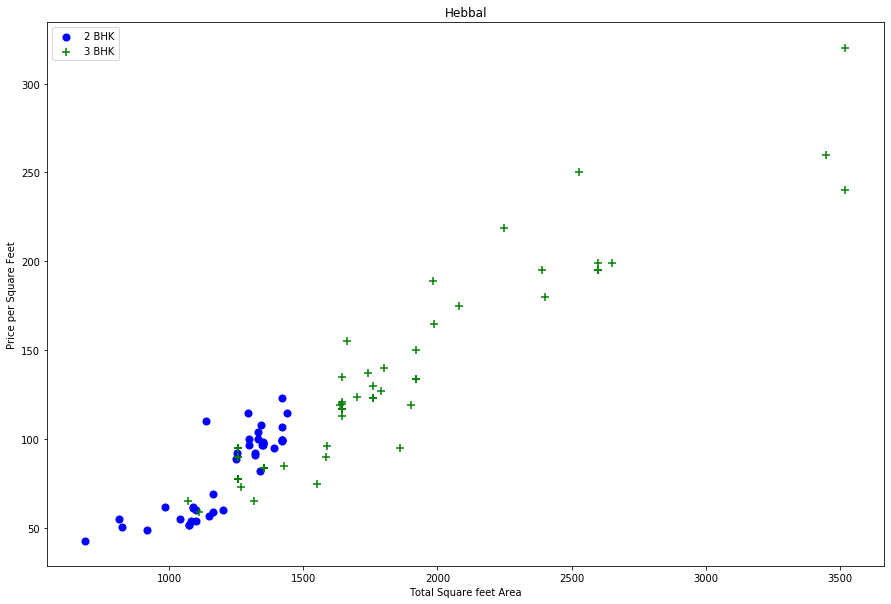

In [99]:
    
plot_scatter_chart(df7,"Hebbal")
plt.savefig('Hebbal_outliers.png', dpi=300)

In [65]:
#df7


<b>We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.</b>



{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}


<b>Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment</b>

In [61]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        #print("location", location)
        #print("location_df", location_df)
        bhk_status = {}
        #print("bhk_status", bhk_status)
        for bhk, bhk_df in location_df.groupby('bhk'):
            #print("bhk", bhk)
            #print("bhk_df",bhk_df)
            bhk_status[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                 # print("mean",mean)
                'std' : np.std(bhk_df.price_per_sqft),
                  #print("std",std)
                'count': bhk_df.shape[0]
                  #print("count", count)
            }
            #print("bhk_status",bhk_status[bhk]  )
        for bhk, bhk_df in location_df.groupby('bhk'):
                status = bhk_status.get(bhk-1)
                #print("status", status)
                if status and status['count']>5:
                    #print("status", status)
                    #print("status_count", status['count']>5)
                    #print("price originnal",bhk_df.price_per_sqft)
                   # print("price less than per sqft",bhk_df[bhk_df.price_per_sqft<(status['mean'])])
                    exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(status['mean'])].index.values)
                    #print("exclude_indices", exclude_indices)
    return df.drop(exclude_indices, axis='index')

df8 =remove_bhk_outliers(df7)
df8.shape

(7329, 7)

<b> Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties </b>

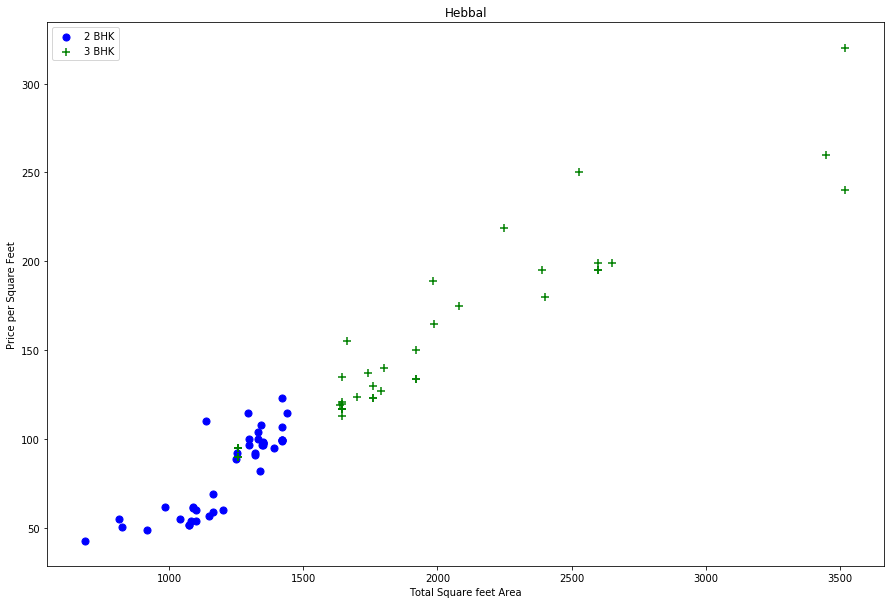

In [63]:
plot_scatter_chart(df8,"Hebbal")

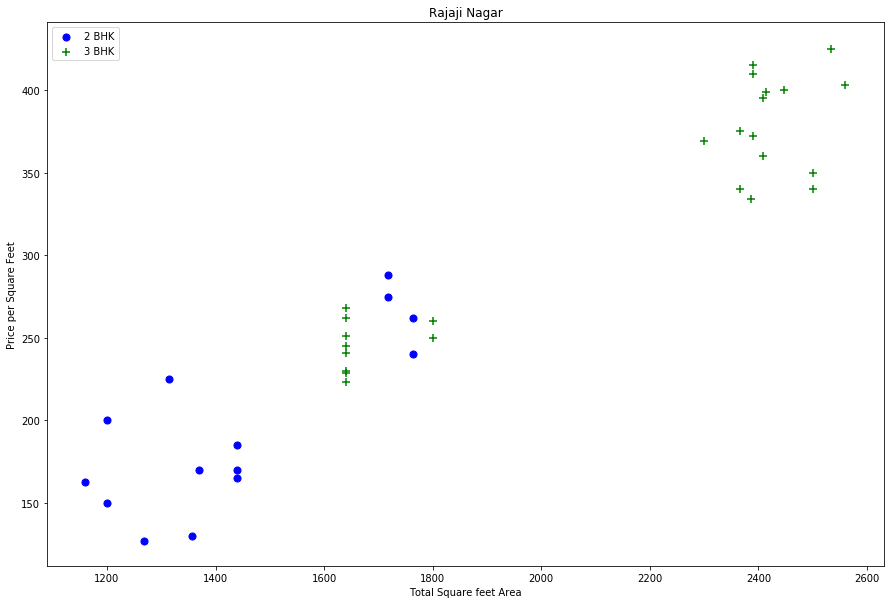

In [64]:
plot_scatter_chart(df8,"Rajaji Nagar")

<b> Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function</b>

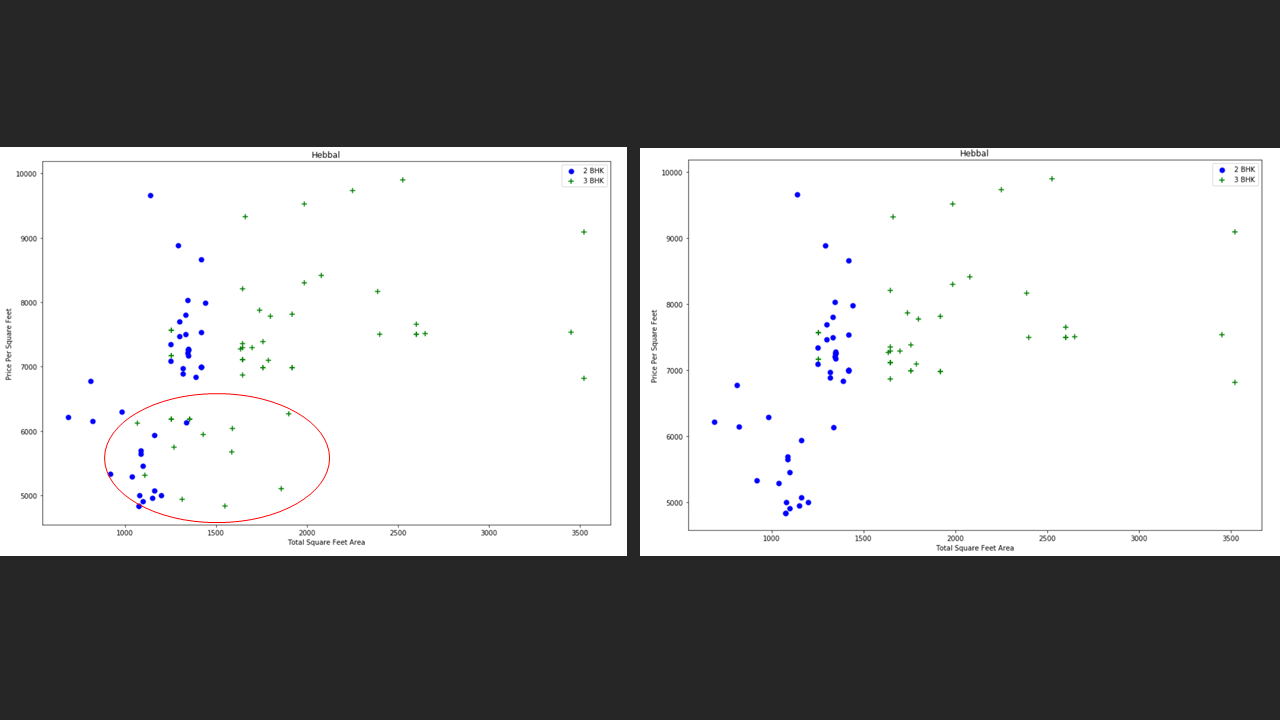

## Before and after outlier removal: Hebbal 

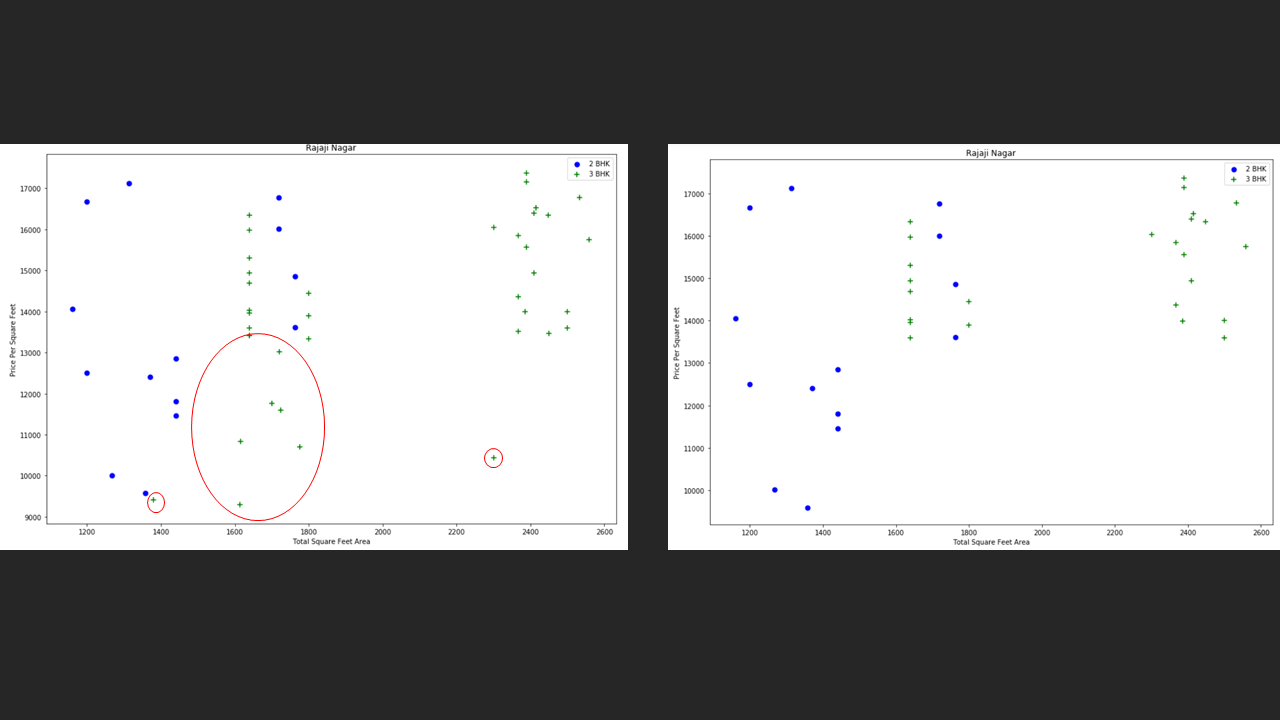

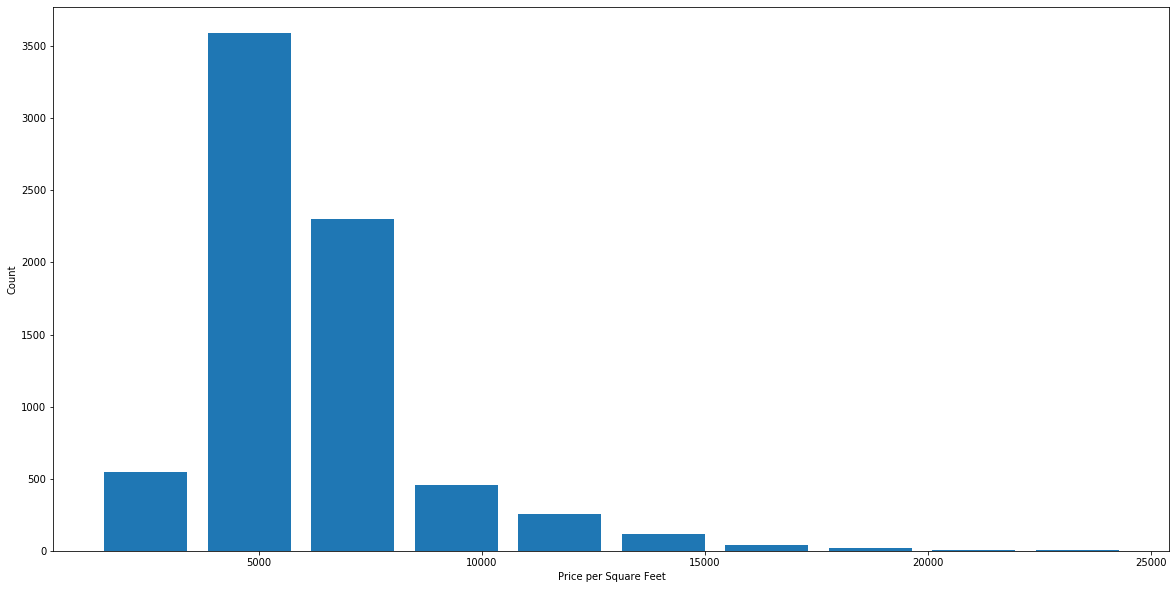

In [66]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")
plt.show()

# Outlier Removal Using Bathrooms Features

In [67]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [68]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

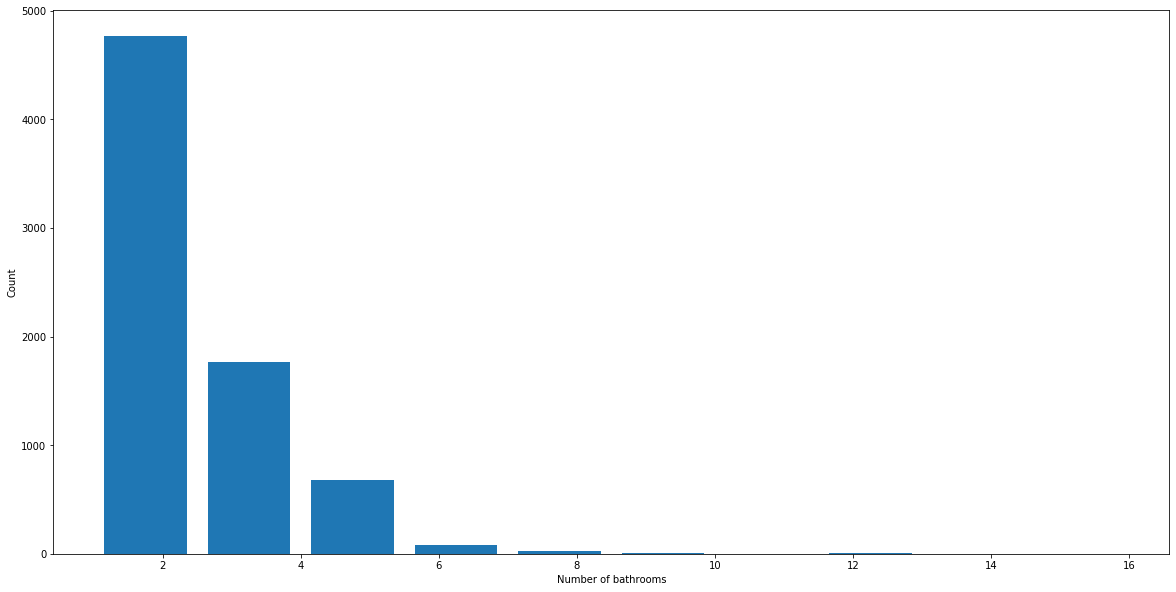

In [69]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

<b> It is unusual to have 2 more bathrooms than number of bedrooms in a home</b>

In [70]:
df8[df8.bath>df8.bhk+2]# here bathroom is higher than the bhk + 2 it is outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


<b> Again the business manager has a conversation with you (i.e aa data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed </b> 

In [74]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape
#df9.head(10)

(7251, 7)

In [75]:
df10 = df9.drop(['size','price_per_sqft'], axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


# Use One Hot Encoding For Location

In [76]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')# droping the other column
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df12= df11.drop('location',axis='columns')# drop the location columns becausse we have dummies colums for that
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Build a Model Now..

In [80]:
df12.shape

(7251, 245)

In [81]:
X = df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
y= df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =10)

In [84]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874306

# Use K Fold cross validation to measure accuracy of LinearRegression model

In [85]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)# shuffle is randomize the samples so each of fold have equal distibution
cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

<b> We can See that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other 
    algorithms for regression to see if we can get even better score. we will use GridSearchCV for this Purpose</b>
    

# Find best model using GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687605,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.731198,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


<b>Based on above results we can say that LinearRegression gives the best score. Hence we will use that.</b>

In [87]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [88]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]# its the location number

5

# Test the model for few properties

In [92]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index]=1# set the locaton index is 1
        #print("index",x[loc_index])
    return lr_clf.predict([x])[0]

In [93]:
predict_price('1st Phase JP Nagar',1000,2,2)

83.49904677178087

In [94]:
predict_price('1st Phase JP Nagar',1000,2,3)

81.72616900753623

In [95]:
predict_price('Indira Nagar',1000,2,2)

181.27815484006874

In [96]:
predict_price('Indira Nagar',1000,3,3)

184.5843020203348

# Export the tested model to a pickle file

In [97]:
import pickle
with open('banglore_home_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [101]:
pwd

'I:\\BHP\\model'

# Export location and column information to a file that will be useful later on in our prediction application

In [100]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json","w")as f:
    f.write(json.dumps(columns))